In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Library Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Pastikan plot muncul
%matplotlib inline
sns.set_style('whitegrid')

print("✅ Library berhasil dimuat.")
print("Versi TensorFlow:", tf.__version__)

✅ Library berhasil dimuat.
Versi TensorFlow: 2.20.0


In [43]:
# Gunakan Raw String (r'') untuk path Windows
path_dataset = r'C:\kelompok-11-Machine-Learning\data\heart_failure_clinical_records_dataset.csv'

if os.path.exists(path_dataset):
    df = pd.read_csv(path_dataset)
    print("✅ Data berhasil dimuat!")
    display(df.head())
else:
    print("❌ ERROR: File tidak ditemukan di path:", path_dataset)
    print("Cek kembali apakah folder 'data' dan filenya sudah benar.")

✅ Data berhasil dimuat!


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [44]:
# 1. Pisahkan Fitur dan Target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# 2. Split Data (80% Train, 20% Test) - Kunci dengan random_state=42 agar adil dengan UTS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scaling (WAJIB untuk Deep Learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data siap. Ukuran training set: {X_train_scaled.shape}")

✅ Data siap. Ukuran training set: (239, 12)


In [45]:
# Menentukan dimensi input secara dinamis
input_dim = X_train_scaled.shape[1]

model = Sequential([
    # Layer Input (Mengatasi UserWarning)
    Input(shape=(input_dim,)),
    
    # Hidden Layer 1: 64 neuron
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    # Hidden Layer 2: 32 neuron
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("--- RINGKASAN ARSITEKTUR MODEL (TABEL 1) ---")
model.summary()

--- RINGKASAN ARSITEKTUR MODEL (TABEL 1) ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
print("Memulai proses training...")
# Simpan history untuk grafik di paper nanti
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    verbose=1 # Ubah ke 1 untuk melihat progress per baris
)
print("✅ Training selesai!")

Memulai proses training...
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6360 - loss: 0.6867 - val_accuracy: 0.6833 - val_loss: 0.6106
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6946 - loss: 0.6057 - val_accuracy: 0.7167 - val_loss: 0.5610
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6946 - loss: 0.6018 - val_accuracy: 0.7500 - val_loss: 0.5244
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7364 - loss: 0.5471 - val_accuracy: 0.7667 - val_loss: 0.4984
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7490 - loss: 0.5198 - val_accuracy: 0.7500 - val_loss: 0.4767
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7741 - loss: 0.4786 - val_accuracy: 0.7833 - val_loss: 0.4577
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7950 - loss: 0.4473 - val_accuracy: 0.7833 - val_loss: 0.4443
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8033 - loss

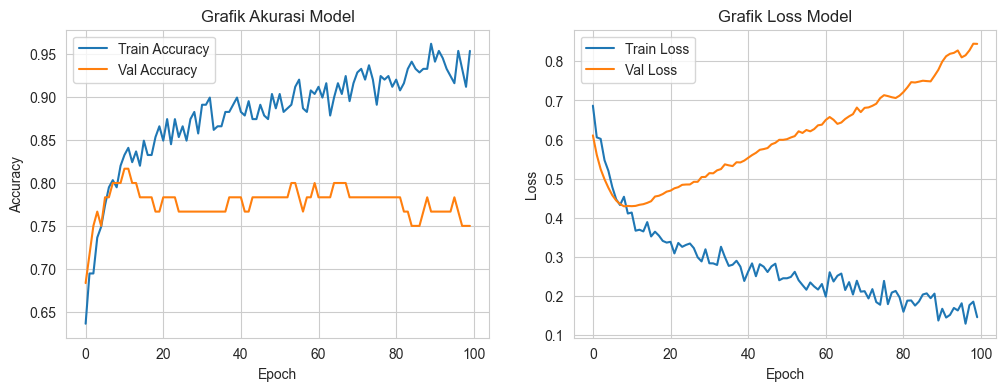

In [47]:
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

--- CONFUSION MATRIX ---


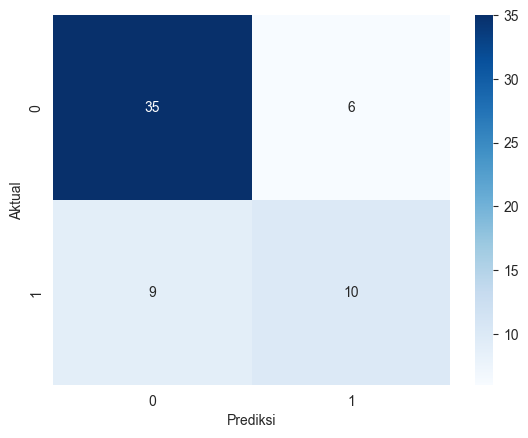


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.62      0.53      0.57        19

    accuracy                           0.75        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60

ROC-AUC Score: 0.8010


In [48]:
# Prediksi probabilitas
y_pred_prob = model.predict(X_test_scaled)
# Ubah ke label biner
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {auc:.4f}")